In [7]:
import scipy.misc 
import glob
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from cv2 import imwrite

In [8]:
def load_file(path, dtype=np.float32):
        array = np.array(Image.open(path), dtype)
        
        
        size = array.shape[0]
     

        if 'mask' in path:	
            if np.sum(array) < 1:
                label_tensor = np.zeros((size,size,2))
                array_background = np.ones((size,size))
                array_segmentation = np.zeros((size,size))
            
                label_tensor[:,:,0] = array_background
                label_tensor[:,:,1] = array_segmentation
                array = label_tensor

            else:
                nonzero_label = np.zeros((size,size,2))
                segmentation = array
                background = 1-array
                
                nonzero_label[:,:,0] = background
                nonzero_label[:,:,1] = segmentation	
                array = nonzero_label

        return  array
    

In [9]:
def find_data_files(search_path):
    data_suffix=".tif"
    mask_suffix='_mask.tif'
    
    all_files = glob.glob(search_path)
    return [name for name in all_files if data_suffix in name and not mask_suffix in name]

In [10]:
def next_data(path):
    data_suffix=".tif"
    mask_suffix='_mask.tif'
    
    image_name = path
    label_name = image_name.replace(data_suffix, mask_suffix)
        
    img = load_file(image_name, np.float32)
    label = load_file(label_name, np.float32)
    
    return img,label

In [11]:
path_list = find_data_files('validation_set/*.tif')


In [261]:
for path in path_list:
    data, label = next_data(path)
    imwrite('test_data_processed/'+ path.split("/")[1].replace('.tif','_mask.jpg') , label[:,:,1])
    imwrite('test_data_processed/'+ path.split("/")[1].replace('.tif','.jpg') ,data)
    

In [264]:

data, label = next_data(path_list[0])
path_list[0]
    

'validation_set/JPCLN121.tif'

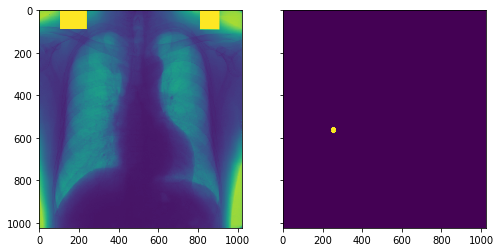

In [263]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(data, aspect="auto")
ax[1].imshow(label[:,:,1], aspect="auto")



In [13]:
import tensorflow as tf

/Applications/anaconda/envs/mlpy3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Applications/anaconda/envs/mlpy3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(512, 512, 1)

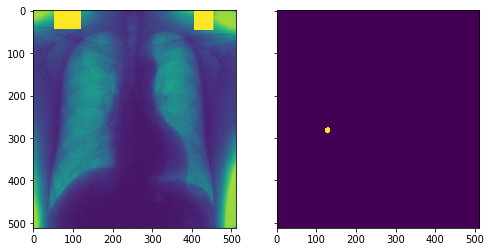

In [15]:
image_path = 'net2/test_data_processed/JPCLN121.jpg'
mask_path = 'net2/test_data_processed/JPCLN121_mask.jpg'

dw = 2
size = int(1024/dw)

image_file = tf.read_file(image_path)
mask_file = tf.read_file(mask_path)

image = tf.image.decode_jpeg(image_file, channels=1)
image.set_shape([1024, 1024, 1])
image = tf.cast(image, tf.float32)
image = tf.image.resize_images(
    image,
    (size,size),

)
mask = tf.image.decode_jpeg(mask_file, channels=1)
mask.set_shape([1024, 1024, 1])
mask = tf.cast(mask, tf.float32)
mask = mask / (tf.reduce_max(mask) + 1e-7)
mask = tf.image.resize_images(
    mask,
    (size,size),
   )


with tf.Session() as sess:
    x, y = sess.run([image, mask])
    
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x[:,:,0], aspect="auto")
ax[1].imshow(y[:,:,0], aspect="auto")
x.shape

# Crate CSV files for test and training set. 

In [272]:


new_list = [element.split("/")[1].replace('.tif','_mask.jpg') for element in path_list]
new_list2 = [element.split("/")[1].replace('.tif','.jpg') for element in path_list]

com_list = np.column_stack((new_list2,new_list))

np.savetxt('train_file_names'+'.csv', com_list, delimiter=",", fmt='%s')


array([['JPCLN001.jpg', 'JPCLN001_mask.jpg'],
       ['JPCLN002.jpg', 'JPCLN002_mask.jpg'],
       ['JPCLN003.jpg', 'JPCLN003_mask.jpg'],
       ['JPCLN004.jpg', 'JPCLN004_mask.jpg'],
       ['JPCLN005.jpg', 'JPCLN005_mask.jpg'],
       ['JPCLN006.jpg', 'JPCLN006_mask.jpg'],
       ['JPCLN007.jpg', 'JPCLN007_mask.jpg'],
       ['JPCLN008.jpg', 'JPCLN008_mask.jpg'],
       ['JPCLN009.jpg', 'JPCLN009_mask.jpg'],
       ['JPCLN010.jpg', 'JPCLN010_mask.jpg'],
       ['JPCLN011.jpg', 'JPCLN011_mask.jpg'],
       ['JPCLN012.jpg', 'JPCLN012_mask.jpg'],
       ['JPCLN013.jpg', 'JPCLN013_mask.jpg'],
       ['JPCLN014.jpg', 'JPCLN014_mask.jpg'],
       ['JPCLN015.jpg', 'JPCLN015_mask.jpg'],
       ['JPCLN016.jpg', 'JPCLN016_mask.jpg'],
       ['JPCLN017.jpg', 'JPCLN017_mask.jpg'],
       ['JPCLN018.jpg', 'JPCLN018_mask.jpg'],
       ['JPCLN019.jpg', 'JPCLN019_mask.jpg'],
       ['JPCLN020.jpg', 'JPCLN020_mask.jpg'],
       ['JPCLN021.jpg', 'JPCLN021_mask.jpg'],
       ['JPCLN022.jpg', 'JPCLN022_

In [6]:
from numpy import genfromtxt
            
genfromtxt('net2/train.csv', delimiter=',')


array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan,

In [22]:
ls


README.md              preprocessing.ipynb    tifdata/
net2/                  test_valid_plot.ipynb  unet_jjupyter.ipynb
off_shelf_unet.py      tf_unet/               validation_set/


In [20]:
from numpy import genfromtxt
import pandas as pd 
import tensorflow as tf


NameError: name 'pwd' is not defined

In [19]:

def data_processing(csv_file):
    """
    Function that reads the csv function, shuffles it and shapes it into
    a matrix suitable for tensorflow dataframe. Return dataset with
    filename in the postiion of the images.
    """
    pd_frame = pd.DataFrame.from_csv(csv_file, header=None, index_col=None)

    input_file = pd_frame[0].tolist()
    mask_file = pd_frame[1].tolist()
    
    tf_dataset = tf.data.Dataset.from_tensor_slices((input_file, mask_file))


    return (tf_dataset)
    

def _parser_function(input_file, mask_file):
    
    image_path = 'test_data_processed/' + input_file
    mask_path = 'test_data_processed/' + mask_file

    dw = 2
    size = int(1024/dw)

    image_file = tf.read_file(image_path)
    mask_file = tf.read_file(mask_path)

    image = tf.image.decode_jpeg(image_file, channels=1)
    image.set_shape([1024, 1024, 1])
    image = tf.cast(image, tf.float32)
    image = tf.image.resize_images(image,(size,size))
    
    mask = tf.image.decode_jpeg(mask_file, channels=1)
    mask.set_shape([1024, 1024, 1])
    mask = tf.cast(mask, tf.float32)
    mask = mask / (tf.reduce_max(mask) + 1e-7)
    mask = tf.image.resize_images(
        mask,
        (size,size),
       )


    return image, mask



tf_dataset = data_processing('train.csv')

tf_dataset_images = tf_dataset.map(_parser_function)


iterator = tf.data.Iterator.from_structure(tf_dataset_images.output_types, tf_dataset_images.output_shapes)

next_element = iterator.get_next()

data_iterator  = iterator.make_initializer(tf_dataset_images)

imag = next_element[0]
mask  = next_element[1]


with tf.Session() as sess:
    sess.run(data_iterator)

    #sess.run(init_var)

    dat = sess.run([mask])
    print(dat)



FileNotFoundError: File b'train.csv' does not exist